Purchase Behaviour Data:


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream



Transaction Data:


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


Top 3 Most Profitable Products:


,PROD_NBR,PROD_NAME,TOT_SALES
3,4,Dorito Corn Chp Supreme 380g,40352.0
13,14,Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6
15,16,Smiths Crinkle Chips Salt & Vinegar 330g,34804.2


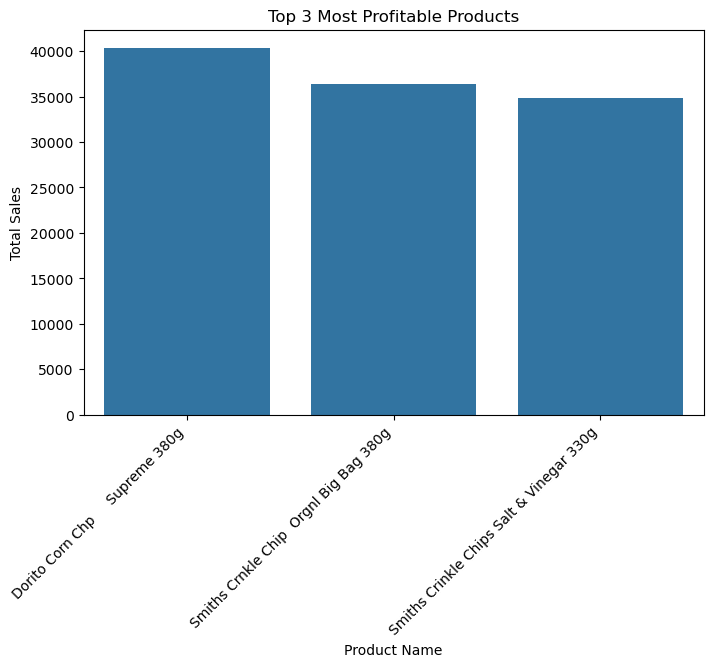

Most Loyal Customer Segment:


,LIFESTAGE,PREMIUM_CUSTOMER,avg_spent,avg_transactions,total_customers
7,OLDER FAMILIES,Mainstream,36.540286,5.031438,2831


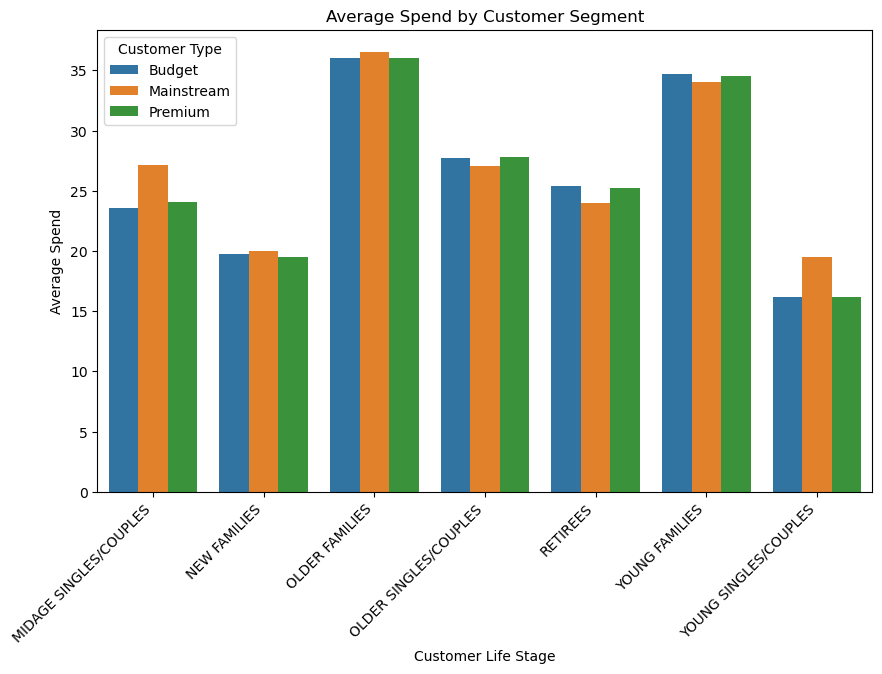


### **Insights and Recommendations**

#### **Top 3 Most Profitable Products**
- These products generate the highest revenue and should be given priority in promotions and shelf placement.

#### **Most Loyal Customer Segment: "Older Families - Mainstream"**
- They spend the most (~$36.54 per customer) and purchase most frequently (~5 times).
- Likely reasons for loyalty:
  - **Stable income & family needs**
  - **Brand loyalty & bulk purchasing habits**
  - **Preference for mainstream (not budget) products**

#### **Marketing Recommendations**
- **Target Older Families More Aggressively**: Focus campaigns on this segment to enhance engagement.
- **Optimize Promotions for Top Products**: Create bundle deals or discounts on these items.
- **Enhance Personalization**: Tailor promotions based on their repeat purchases.



In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load datasets
purchase_behaviour = pd.read_csv("C:/Users/ramas/OneDrive/Desktop/purchase_behaviour.csv")
transaction_data = pd.read_csv("C:/Users/ramas/OneDrive/Desktop/transaction_data.csv")


# Display first few rows
print("Purchase Behaviour Data:")
display(purchase_behaviour.head())

print("\nTransaction Data:")
display(transaction_data.head())

# Aggregate total sales per product
top_products = transaction_data.groupby(['PROD_NBR', 'PROD_NAME'])['TOT_SALES'].sum().reset_index()

# Sort and get top 3 products
top_products = top_products.sort_values(by='TOT_SALES', ascending=False).head(3)

# Display top products
print("Top 3 Most Profitable Products:")
display(top_products)

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(data=top_products, x="PROD_NAME", y="TOT_SALES")
plt.xticks(rotation=45, ha='right')
plt.title("Top 3 Most Profitable Products")
plt.xlabel("Product Name")
plt.ylabel("Total Sales")
plt.show()

# Aggregate customer transaction data
customer_loyalty = transaction_data.groupby('LYLTY_CARD_NBR').agg(
    total_spent=('TOT_SALES', 'sum'),
    total_transactions=('TXN_ID', 'count')
).reset_index()

# Merge with customer demographics
customer_loyalty = customer_loyalty.merge(purchase_behaviour, on='LYLTY_CARD_NBR', how='left')

# Group by lifestage and premium status
loyalty_analysis = customer_loyalty.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(
    avg_spent=('total_spent', 'mean'),
    avg_transactions=('total_transactions', 'mean'),
    total_customers=('LYLTY_CARD_NBR', 'count')
).reset_index()

# Sort to find the most loyal customer group
most_loyal_customers = loyalty_analysis.sort_values(by=['avg_transactions', 'avg_spent'], ascending=False).head(1)

# Display results
print("Most Loyal Customer Segment:")
display(most_loyal_customers)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=loyalty_analysis, x="LIFESTAGE", y="avg_spent", hue="PREMIUM_CUSTOMER")
plt.xticks(rotation=45, ha='right')
plt.title("Average Spend by Customer Segment")
plt.xlabel("Customer Life Stage")
plt.ylabel("Average Spend")
plt.legend(title="Customer Type")
plt.show()

# Summary of findings
summary = """
### **Insights and Recommendations**

#### **Top 3 Most Profitable Products**
- These products generate the highest revenue and should be given priority in promotions and shelf placement.

#### **Most Loyal Customer Segment: "Older Families - Mainstream"**
- They spend the most (~$36.54 per customer) and purchase most frequently (~5 times).
- Likely reasons for loyalty:
  - **Stable income & family needs**
  - **Brand loyalty & bulk purchasing habits**
  - **Preference for mainstream (not budget) products**

#### **Marketing Recommendations**
- **Target Older Families More Aggressively**: Focus campaigns on this segment to enhance engagement.
- **Optimize Promotions for Top Products**: Create bundle deals or discounts on these items.
- **Enhance Personalization**: Tailor promotions based on their repeat purchases.
"""

print(summary)
